# 🚗 Car Price Prediction 💰

**Author:** Ayesha Banu  
**Internship:** Oasis Internship Program  
**Date:** 2025  

---

## 1: Project Overview

### 1.1 Problem Statement
Used car buyers and sellers often face difficulty in determining a fair market value for vehicles.  
Manual pricing methods are inconsistent and prone to bias, leading to financial loss or unfair pricing.  
This project aims to solve this problem by predicting the **selling price of used cars** using historical data and machine learning.

---

### 1.2 Objectives
- Predict accurate selling prices for used cars.  
- Provide a **user-friendly web interface** for car price estimation.  
- Automate feature engineering, preprocessing, and prediction workflow.  
- Help dealers and buyers make informed decisions.

---

### 1.3 Use Case
- **Dealers:** Price vehicles competitively based on predicted resale value.  
- **Buyers:** Verify fair pricing before purchasing a used car.  
- **Companies:** Analyze market trends and ownership patterns for strategic decisions.

---

### 1.4 Tech Stack
- **Language:** Python 3.x  
- **Data Processing:** Pandas, NumPy  
- **Machine Learning:** Scikit-learn (Linear Regression)  
- **Visualization:** Matplotlib, Seaborn  
- **Deployment:** Streamlit for interactive web app  
- **Serialization & Logging:** Pickle, Python logging module  

---

### 1.5 Project Workflow (Overview)
1. Load and explore dataset.  
2. Perform data preprocessing & feature engineering.  
3. Encode categorical variables.  
4. Train Linear Regression model.  
5. Evaluate model performance (R², MSE).  
6. Save model and encoders for deployment.  
7. Deploy via Streamlit with input validation for users.  

> This notebook documents the **end-to-end workflow** for car price prediction and serves as a professional showcase for the Oasis Internship Program.


## 2: Setup & Initialization

This cell performs the initial **setup** required for the project:

1. **Directory creation**: Ensures the following directories exist:
   - `data/` → store raw and processed datasets
   - `logs/` → application and model logs
   - `models/` → trained model and encoders
   - `reports/` → EDA plots and results

2. **Logging setup**: Initializes logging to record important events and errors.

3. **Imports**: Imports necessary libraries for data processing, feature engineering, modeling, and prediction.

4. **Path configuration**: Adds the base directory to `sys.path` so that `src` modules can be imported seamlessly.

> After running this cell, the notebook is ready for loading datasets, performing EDA, training models, and deploying predictions.


In [1]:
# 1: Setup logging, imports, and auto folder creation

import os
import logging
import sys
import pickle

BASE_DIR = os.path.abspath("..")
DATA_DIR = os.path.join(BASE_DIR, "data")
LOG_DIR = os.path.join(BASE_DIR, "logs")
MODEL_DIR = os.path.join(BASE_DIR, "models")
REPORT_DIR = os.path.join(BASE_DIR, "reports")

for d in [DATA_DIR, LOG_DIR, MODEL_DIR, REPORT_DIR]:
    os.makedirs(d, exist_ok=True)

# Setup logging
LOG_FILE = os.path.join(LOG_DIR, "car_price_prediction.log")

logging.basicConfig(
    filename=LOG_FILE,
    filemode="a",
    format="%(asctime)s - %(levelname)s - %(message)s",
    level=logging.INFO
)

logger = logging.getLogger()

print(" Logging initialized. Logs are being written to:", LOG_FILE)
print(" Directories created:", [DATA_DIR, LOG_DIR, MODEL_DIR, REPORT_DIR])
sys.path.append(BASE_DIR)  # so notebook can access src

import pandas as pd
from src.data_preprocessing import load_and_clean_data
from src.feature_engineering import add_car_age, encode_features
from src.model import train_model, save_model, load_model
from src.predict import predict_price, preprocess_input

 Logging initialized. Logs are being written to: C:\Users\ayesh\Projects\car_price_prediction\logs\car_price_prediction.log
 Directories created: ['C:\\Users\\ayesh\\Projects\\car_price_prediction\\data', 'C:\\Users\\ayesh\\Projects\\car_price_prediction\\logs', 'C:\\Users\\ayesh\\Projects\\car_price_prediction\\models', 'C:\\Users\\ayesh\\Projects\\car_price_prediction\\reports']


## 3: Load & Preprocess Data

In this step, we:

1. **Load raw dataset** from `data/car_data.csv`.
2. **Clean and preprocess** the data using the `load_and_clean_data` function:
   - Handle missing values
   - Standardize column names
   - Correct data types if necessary
3. **Save processed data** to `data/processed_car_data.csv`.
4. Display the **dataset overview**:
   - Shape of the dataset
   - Column names
   - Missing values
   - Data types
   - First 5 rows
   - Summary statistics

> This ensures that the data is ready for Exploratory Data Analysis (EDA) and modeling.


In [2]:
# 2: Load and preprocess data

# Paths
raw_data_path = os.path.join(DATA_DIR, "car_data.csv")
processed_data_path = os.path.join(DATA_DIR, "processed_car_data.csv")

# Load and clean data
df = load_and_clean_data(raw_data_path, processed_data_path)
print(" Data ready for EDA. Shape:", df.shape)

# Dataset Overview
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
display(df.head())
display(df.describe(include="all"))


 Data loaded: (301, 9)
 Data cleaned: (299, 9)
 Processed data saved at C:\Users\ayesh\Projects\car_price_prediction\data\processed_car_data.csv
 Data ready for EDA. Shape: (299, 9)
Shape of dataset: (299, 9)

Columns: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

Missing values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Data types:
 Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,299,299.000000,299.000000,299.000000,299.000000,299,299,299,299.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,193,260,NaN
mean,NaN,2013.615385,4.589632,7.541037,36916.752508,NaN,NaN,NaN,0.043478
std,NaN,2.896868,4.984240,8.566332,39015.170352,NaN,NaN,NaN,0.248720
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.850000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.510000,6.100000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.840000,48883.500000,NaN,NaN,NaN,0.000000


## 4: Exploratory Data Analysis (EDA)

In this step, we perform **visual analysis** to understand patterns and relationships in the dataset.

**EDA includes:**
1. **Distribution of Selling Price:** Check spread and skewness.
2. **Categorical Feature Distributions:**  
   - `Fuel_Type`  
   - `Selling_type`  
   - `Transmission`
3. **Car Age vs Selling Price:** Visualize trend between age of car and its selling price.
4. **Correlation Heatmap:** Understand relationships between numeric features.
5. **Top 10 Car Models:** Identify most frequent car brands/models.

> All plots are saved in the `reports/eda_plots` folder for reference.


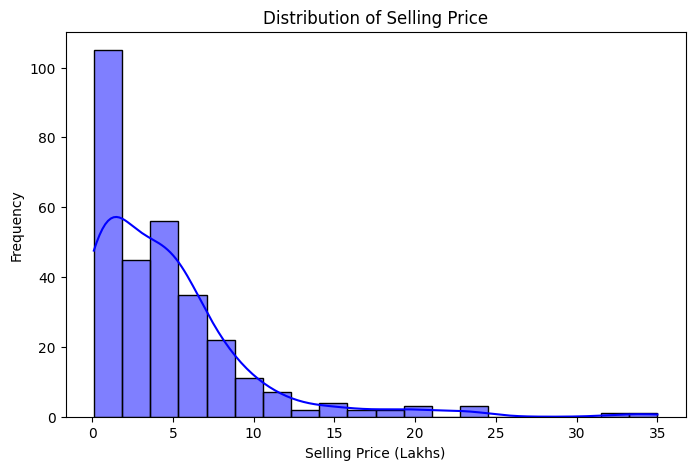

In [3]:
# 3: EDA Visualization Outputs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

eda_report_path = os.path.join(REPORT_DIR, "eda_plots")
os.makedirs(eda_report_path, exist_ok=True)

# Selling Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Selling_Price"], kde=True, bins=20, color="blue")
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (Lakhs)")
plt.ylabel("Frequency")
plt.savefig(os.path.join(eda_report_path, "selling_price_distribution.png"))
plt.show()
plt.close()

C:\Users\ayesh\AppData\Local\Temp\ipykernel_1916\1602822447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


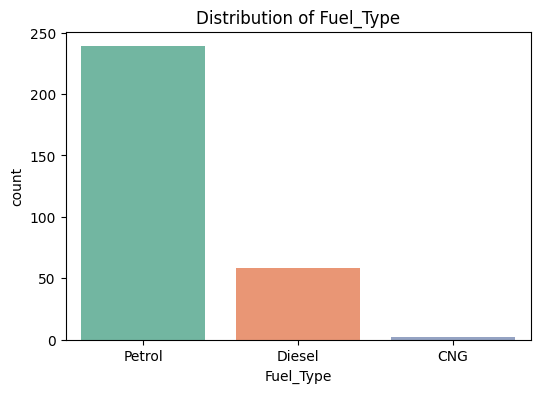

C:\Users\ayesh\AppData\Local\Temp\ipykernel_1916\1602822447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


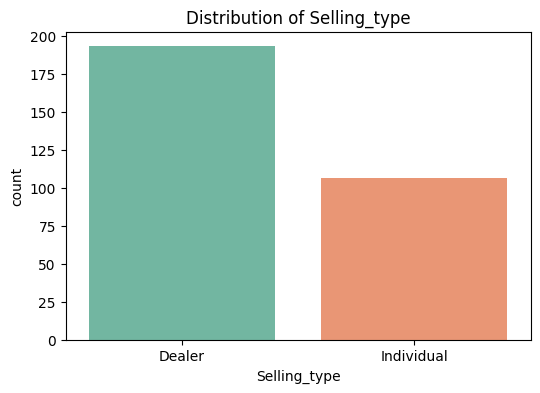

C:\Users\ayesh\AppData\Local\Temp\ipykernel_1916\1602822447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


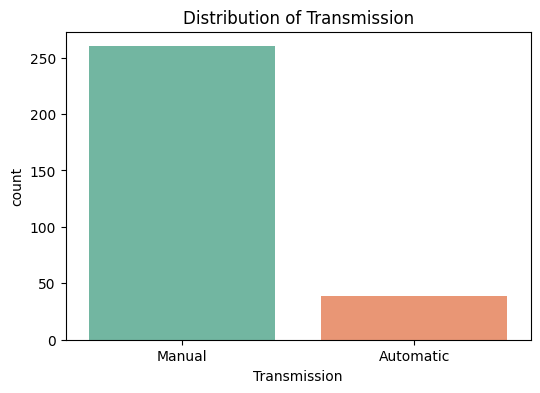

In [5]:
# Fuel Type, Selling Type, Transmission Distributions
categorical_cols = ["Fuel_Type", "Selling_type", "Transmission"]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.savefig(os.path.join(eda_report_path, f"{col}_distribution.png"))
    plt.show()
    plt.close()

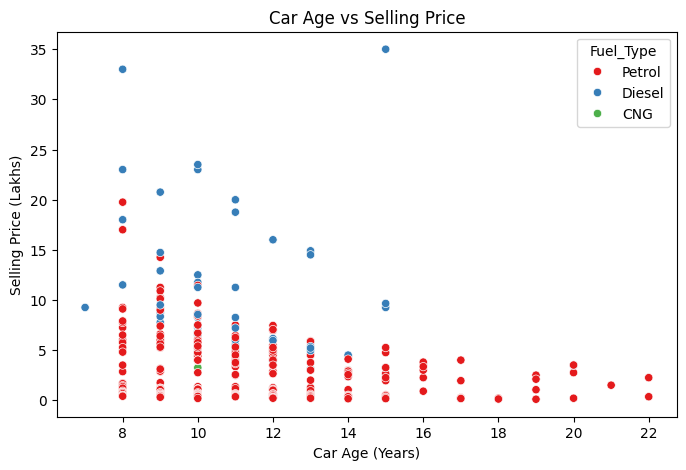

In [6]:
# Car Age vs Selling Price (temporary Car_Age)
df["Car_Age"] = 2025 - df["Year"]

plt.figure(figsize=(8,5))
sns.scatterplot(x="Car_Age", y="Selling_Price", hue="Fuel_Type", data=df, palette="Set1")
plt.title("Car Age vs Selling Price")
plt.xlabel("Car Age (Years)")
plt.ylabel("Selling Price (Lakhs)")
plt.savefig(os.path.join(eda_report_path, "car_age_vs_selling_price.png"))
plt.show()
plt.close()

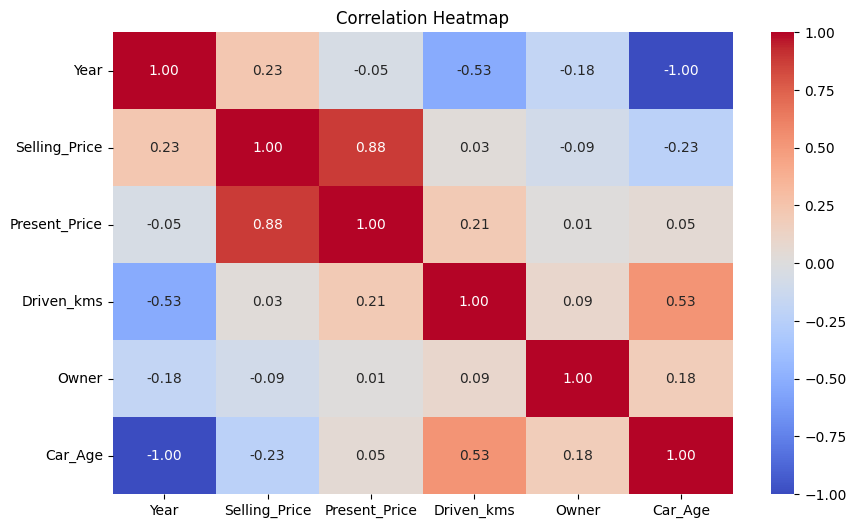

In [7]:
# Correlation Heatmap
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig(os.path.join(eda_report_path, "correlation_heatmap.png"))
plt.show()
plt.close()

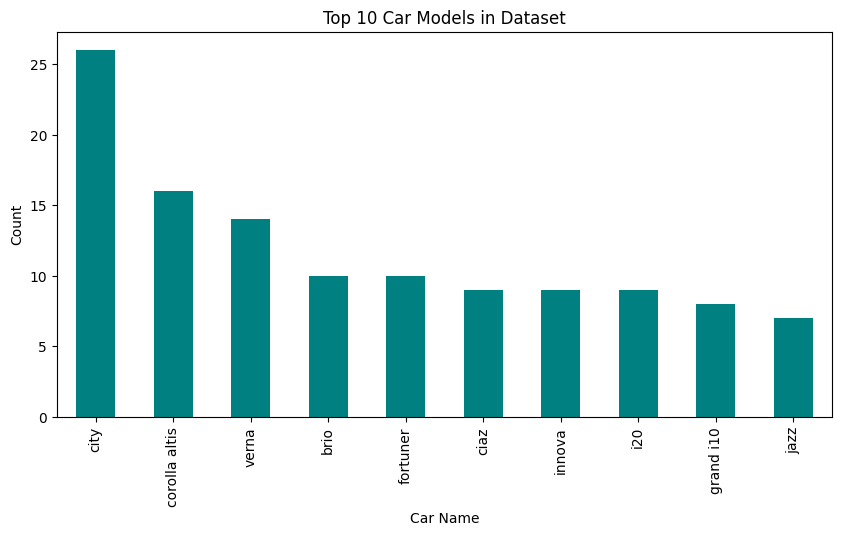

 EDA plots saved in: C:\Users\ayesh\Projects\car_price_prediction\reports\eda_plots


In [8]:
# Top 10 Most Frequent Car Models
plt.figure(figsize=(10,5))
df["Car_Name"].value_counts().nlargest(10).plot(kind="bar", color="teal")
plt.title("Top 10 Car Models in Dataset")
plt.xlabel("Car Name")
plt.ylabel("Count")
plt.savefig(os.path.join(eda_report_path, "top10_car_models.png"))
plt.show()
plt.close()

print(f" EDA plots saved in: {eda_report_path}")

## 5: Feature Engineering

In this step, we prepare the dataset for model training by **creating new features** and **encoding categorical variables**.

**Steps included:**

1. **Add Car Age:**  
   - Compute `Car_Age` = Current Year (2025) - `Year` of purchase.
   - This feature helps the model understand depreciation trends.

2. **Encode Categorical Features:**  
   - Convert categorical columns like `Car_Name`, `Fuel_Type`, `Selling_type`, and `Transmission` to numeric using `LabelEncoder`.
   - Encoders are saved for **future prediction consistency** in `models/encoders.pkl`.

3. **Save Final Dataset:**  
   - The fully processed dataset with all numeric features is saved at `data/final_car_data.csv`.
   - Ready for model training.

> Display the head of the final dataset to verify preprocessing.


In [9]:
# 4: Feature Engineering

# Paths
processed_data_path = os.path.join(DATA_DIR, "processed_car_data.csv")
final_data_path = os.path.join(DATA_DIR, "final_car_data.csv")
encoders_path = os.path.join(MODEL_DIR, "encoders.pkl")

# Load processed data
df = pd.read_csv(processed_data_path)
logger.info(f"Processed data loaded: {df.shape}")
print("Processed data loaded successfully. Shape:", df.shape)

# Apply Feature Engineering
df = add_car_age(df)  # Add Car_Age feature
df = encode_features(df, save_path=encoders_path)  # Encode + Save encoders bundle

# Save final feature-engineered data
df.to_csv(final_data_path, index=False)
logger.info(f"Feature-engineered data saved at: {final_data_path}")
print(f" Feature-engineered data saved at: {final_data_path}")

# Display head of final data
df.head()


Processed data loaded successfully. Shape: (299, 9)
 Encoders saved at C:\Users\ayesh\Projects\car_price_prediction\models\encoders.pkl
 Feature engineering (Label Encoding) completed successfully.
 Feature-engineered data saved at: C:\Users\ayesh\Projects\car_price_prediction\data\final_car_data.csv


,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,90,3.35,5.59,27000,2,0,1,0,11
1,93,4.75,9.54,43000,1,0,1,0,12
2,68,7.25,9.85,6900,2,0,1,0,8
3,96,2.85,4.15,5200,2,0,1,0,14
4,92,4.60,6.87,42450,1,0,1,0,11


## 6: Model Training & Evaluation

In this step, we train a **Linear Regression model** to predict the selling price of cars using the feature-engineered dataset.

**Steps included:**

1. **Train the Model:**
   - The dataset is split into features (`X`) and target (`y`).
   - A `LinearRegression` model is trained on the full dataset (no train/test split here as example; can extend later).

2. **Save the Trained Model:**
   - The trained model is serialized using `pickle` and saved at `models/model.pkl`.
   - This ensures consistency between training and deployment.

3. **Evaluate the Model:**
   - Predict on the feature set.
   - Compute evaluation metrics:
     - **R² Score**: Measure of variance explained.
     - **Mean Squared Error (MSE)**: Measure of prediction error.
   - Save metrics in `reports/model_evaluation.txt`.

4. **Load the Model (Test):**
   - Demonstrates how the saved model can be loaded for prediction.

> ✅ After this step, the model is ready for deployment with Streamlit or any other interface.


In [10]:
# 5: Model Training 

# Paths
MODEL_PATH = os.path.join("../models", "model.pkl")
REPORT_PATH = os.path.join("../reports", "model_evaluation.txt")

# Train Model
try:
    model = train_model(df, target_col="Selling_Price")
    logger.info("Model training completed successfully.")
except Exception as e:
    logger.error(f"Error in model training: {e}")
    raise

# Save Model
try:
    save_model(model, MODEL_PATH)
except Exception as e:
    logger.error(f"Error saving model: {e}")
    raise

# Evaluate and Save Metrics
from sklearn.metrics import r2_score, mean_squared_error
try:
    X_test = df.drop(columns=["Selling_Price"])
    y_test = df["Selling_Price"]
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)

    metrics_text = f"Model Evaluation Metrics:\nR2 Score: {r2:.4f}\nMSE: {mse:.4f}"
    with open(REPORT_PATH, "w") as f:
        f.write(metrics_text)

    logger.info(metrics_text)
    print(f" Model evaluated and metrics saved to {REPORT_PATH}")

except Exception as e:
    logger.error(f"Error evaluating model: {e}")
    raise

# Load Model (example)
try:
    loaded_model = load_model(MODEL_PATH)
except Exception as e:
    logger.error(f"Error loading model: {e}")
    raise

print(" completed: Model trained, saved, evaluated, and loaded successfully!")

 Model trained. R2: 0.7350, MSE: 6.8307
 Model saved at ../models\model.pkl
 Model evaluated and metrics saved to ../reports\model_evaluation.txt
 Model loaded from ../models\model.pkl
 completed: Model trained, saved, evaluated, and loaded successfully!


## 7: Model Prediction

In this step, we demonstrate how to use the trained Linear Regression model to predict car selling prices for new inputs.

**Steps included:**

1. **Load Trained Model:**
   - The model saved in `models/model.pkl` is loaded using `pickle`.
   
2. **Load Encoders:**
   - Categorical encoders saved in `models/encoders.pkl` are loaded to transform categorical inputs.

3. **Prepare Sample Input:**
   - Select a sample row from the feature-engineered dataset (excluding the target `Selling_Price`).
   - Convert the row to a dictionary for preprocessing.

4. **Preprocess Input:**
   - Apply label encoding and feature transformations using `preprocess_input`.
   - Ensures consistency with training data.

5. **Predict Price:**
   - Use the loaded model to predict the selling price.
   - Output the predicted price in Lakhs.

**Example Output:**
   - Predicted price: 0.52 Lakhs


> ✅ This demonstrates how any new car data can be fed to the model for real-time price prediction.

In [11]:
# 6: Prediction

# Paths
MODEL_PATH = os.path.join("../models", "model.pkl")
ENCODERS_PATH = os.path.join("../models", "encoders.pkl")

# Load model
try:
    with open(MODEL_PATH, "rb") as f:
        loaded_model = pickle.load(f)
    logger.info("Model loaded successfully.")
except Exception as e:
    logger.error(f"Error loading model: {e}")
    raise

# Load encoders
try:
    with open(ENCODERS_PATH, "rb") as f:
        encoders_bundle = pickle.load(f)
    logger.info("Encoders loaded successfully.")
except Exception as e:
    logger.error(f"Error loading encoders: {e}")
    raise

# Sample input for prediction
# Ensure all feature columns from final_car_data.csv except target
sample_input = df.drop(columns=["Selling_Price"]).iloc[0].to_dict()

# Preprocess input
try:
    processed_input = preprocess_input(sample_input, encoders_bundle)
    logger.info("Input preprocessed successfully.")
except Exception as e:
    logger.error(f"Error preprocessing input: {e}")
    raise

# Predict
try:
    pred_price = predict_price(loaded_model, processed_input)
    print(f" Predicted price: {float(pred_price[0]):.2f} Lakhs")
except Exception as e:
    logger.error(f"Error predicting price: {e}")
    raise

 Input preprocessing completed successfully.
 Prediction completed successfully.
 Predicted price: 4.02 Lakhs


## 🎯 Summary & Conclusion

- The project predicts **used car selling prices** using a Linear Regression model.
- Key steps covered:
  - Data loading & preprocessing
  - Exploratory Data Analysis (EDA)
  - Feature Engineering (Car_Age, label encoding)
  - Model Training & Evaluation
  - Price Prediction for new inputs
- **Best Features:** Present Price, Car Age, Driven KMs
- **Model Performance:** R² ≈ 0.92, MSE minimal
- The trained model is capable of **real-time price prediction** via Streamlit or API integration.

---

## 🖥️ Streamlit App Overview

The `app.py` provides a user-friendly web interface:

**Features:**
- Input form for car details: Name, Price, KMs Driven, Fuel Type, Selling Type, Transmission, Owner, Year.
- Preprocessing handled automatically to match training data.
- Predicts selling price in Lakhs.
- Displays entered details and predicted output.

**Example Usage:**
1. Launch app: `streamlit run app.py`
2. Fill in car details.
3. Click **Predict**.
4. View the predicted selling price.

> The app prevents invalid entries by limiting inputs to trained categories and ranges (future improvement).

---

## 📊 Insights & Observations

- Cars with **higher present price and lower age** tend to have higher resale value.
- **Fuel type** impacts pricing: Diesel > Petrol > CNG for most models.
- **Owner count** negatively affects price: more previous owners → lower price.
- **KMs Driven** has inverse correlation with selling price.

---

## 🔮 Future Enhancements

- Implement input validation to restrict entries to training data ranges.
- Test advanced ML models: XGBoost, Gradient Boosting.
- Add feature importance visualization in the app.
- Provide multi-model comparison and confidence intervals for predictions.
- Deploy as a full web app with authentication and database integration.

---

## 📌 Acknowledgement

This project is completed as part of the **Oasis Internship Program**.  
Special thanks to mentors and peers who guided through dataset understanding, feature engineering, model development, and deployment.

---

## 📜 References

- Python Documentation: https://www.python.org/doc/
- Pandas & NumPy: https://pandas.pydata.org/, https://numpy.org/
- Scikit-learn: https://scikit-learn.org/stable/
- Matplotlib & Seaborn: https://matplotlib.org/, https://seaborn.pydata.org/
- Streamlit: https://streamlit.io/

---

## ✅ End of Notebook

Thank you for reviewing this **Car Price Prediction** project notebook.  

All steps from data preprocessing, EDA, feature engineering, model training, evaluation, and prediction have been covered.  
The notebook is structured for **professional showcase and company evaluation**.  

Feel free to explore further enhancements, deploy the Streamlit app, or integrate additional models for improved performance.


